In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [194]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [195]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [196]:
data.shape

(158, 12)

dataset has 158 rows and 12 columns

In [197]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

features counts and Region are holding categorical values,           
feature happiness Rank is holding interger values,         
All other features are holding float variables

In [198]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


there are little skewness in all features, lets explore each columns in EDA section

In [199]:
  data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

dataset is not having any missing values

In [200]:
##lets drop Happiness Rank since its just a ranking based on happiness score which should not have any impact in happiness score prediction

new_data=data.drop('Happiness Rank',axis=1)

In [201]:
new_data.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [202]:
data.shape

(158, 12)

In [203]:
new_data.shape

(158, 11)

# EDA

Lets do univariate Analysis to understand data and find insight from each individual feature

In [204]:
countrylist=new_data['Country'].unique()
print("Total number of countries :", len(countrylist))

Total number of countries : 158


In [205]:
Regionlist=new_data['Region'].unique()
print("Total number of Regions :", len(Regionlist))
for i in Regionlist:
    print(i)

Total number of Regions : 10
Western Europe
North America
Australia and New Zealand
Middle East and Northern Africa
Latin America and Caribbean
Southeastern Asia
Central and Eastern Europe
Eastern Asia
Sub-Saharan Africa
Southern Asia


<AxesSubplot:xlabel='Region', ylabel='count'>

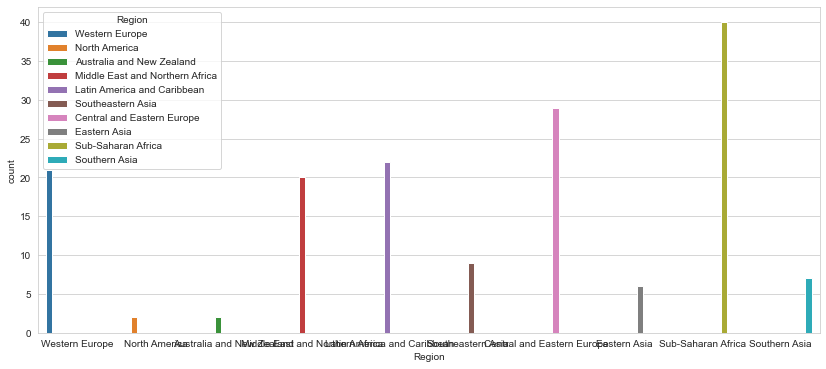

In [206]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='Region', hue='Region', data=data)

Sub-saharan Africa region countries are highly contributes in this data set. i.e, 25% countries nearly
Central and Estern europe region based countries are contributed nearly 19% of data
Latin America and Caribbean region based countries are contributed 15% of data
Western Europe region based countries are contributed 15% of data
North America & Australia and New Zealand contributed very less


10 regions and 158 contries are involved in this dataset

Happiness score is my target variable and rest are independent variables of Happiness score

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

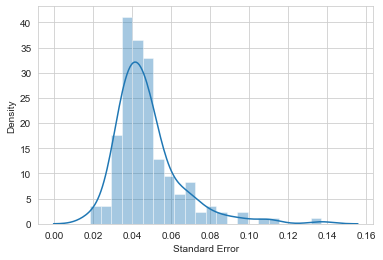

In [207]:
sns.distplot(new_data['Standard Error'])

column standard error is right skewed,      
majority of data is lies nearly between 0.03 to 0.07

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

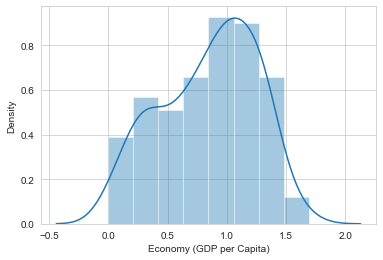

In [208]:
sns.distplot(new_data['Economy (GDP per Capita)'])

column Economy (GDP per Capita) is not normally distributed

<AxesSubplot:xlabel='Family', ylabel='Density'>

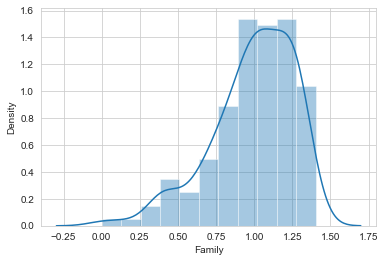

In [209]:
sns.distplot(new_data['Family'])

column Family is is not normally distributed and left skewed

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

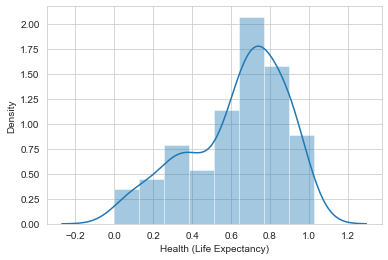

In [210]:
sns.distplot(new_data['Health (Life Expectancy)'])

column Health (Life Expectancy) is is not normally distributed and left skewed

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

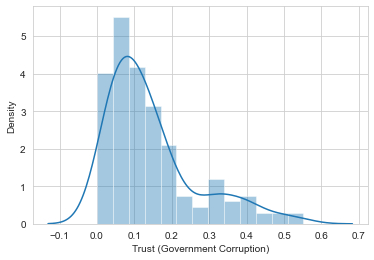

In [211]:
sns.distplot(new_data['Trust (Government Corruption)'])

column Trust (Government Corruption) is is not normally distributed and right skewed     
majority of data distributed between 0 to 0.2

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

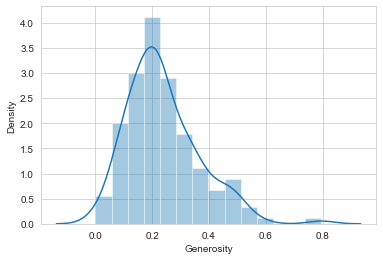

In [212]:
sns.distplot(new_data['Generosity'])

column Generosity is slightly right skewed     
majority of data lies between 0 to 0.04

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

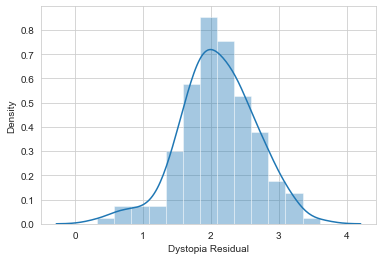

In [213]:
sns.distplot(new_data['Dystopia Residual'])

column Dystopia Residual is slightly right skewed
majority of data lies nearly between 1.5 to 3

all the columns are lighlty skewed and not normally distributed

# lets check for the outliers using boxplot

Happiness Score                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Freedom                          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.257857,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

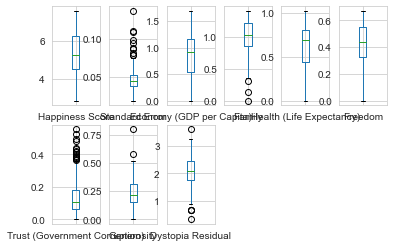

In [214]:
new_data.plot(kind='box',subplots=True,layout=(2,6))

there are outlier in columns standard error,Family,Trust (Government Corruption),Generosity,Dystopia Residual       
other columns does not have any outliers before handling outliers lets do little more EDA to understand the data

# Bivariate Analysis

In [215]:
new_data.groupby(['Region'])['Country'].unique()

Region
Australia and New Zealand                                   [New Zealand, Australia]
Central and Eastern Europe         [Czech Republic, Uzbekistan, Slovakia, Moldova...
Eastern Asia                       [Taiwan, Japan, South Korea, Hong Kong, China,...
Latin America and Caribbean        [Costa Rica, Mexico, Brazil, Venezuela, Panama...
Middle East and Northern Africa    [Israel, United Arab Emirates, Oman, Qatar, Sa...
North America                                                [Canada, United States]
Southeastern Asia                  [Singapore, Thailand, Malaysia, Indonesia, Vie...
Southern Asia                      [Bhutan, Pakistan, Bangladesh, India, Nepal, S...
Sub-Saharan Africa                 [Mauritius, Nigeria, Zambia, Somaliland region...
Western Europe                     [Switzerland, Iceland, Denmark, Norway, Finlan...
Name: Country, dtype: object

In [216]:
countriesperregion=new_data.groupby('Region')['Country'].count()
contributiondf=pd.DataFrame(countriesperregion)
contributiondf.head()

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20


Text(0.5, 1.0, 'Happiness score Vs Regions')

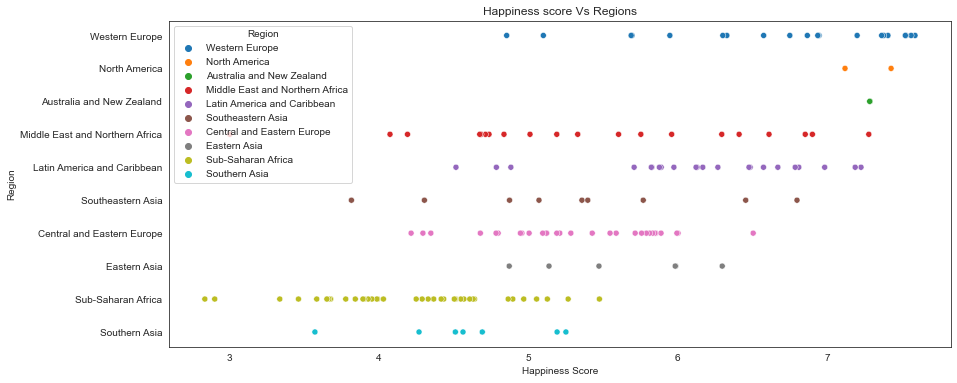

In [217]:
plt.figure(figsize=(14,6))
sns.set_style('white')
sns.scatterplot(x='Happiness Score',y='Region',hue='Region', data=new_data)
plt.title('Happiness score Vs Regions')

highest happiness score are from wetern europe country         
lowest happiness score are from subsaharan Africa        
highest happiness score is nearly 7         
western Europe,  North America, Australia and Newzealand,Latin ameria and Caribbean regions based coutries hold the most happiness score

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

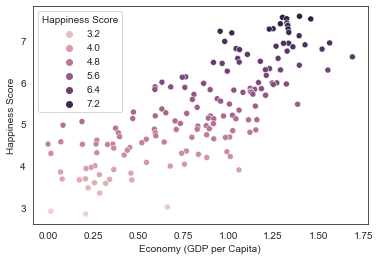

In [218]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',hue='Happiness Score', data=new_data)

More GDP per Capita cotributes to more Happiness score, means Economy GDP per capita highly correlate with Happiness score

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

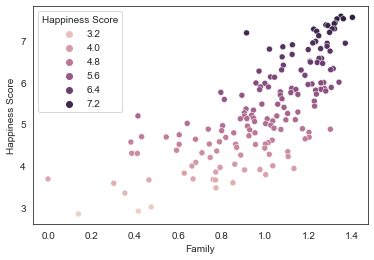

In [219]:
sns.scatterplot(x='Family',y='Happiness Score',hue='Happiness Score', data=new_data)

increase in family values increase the happines score

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

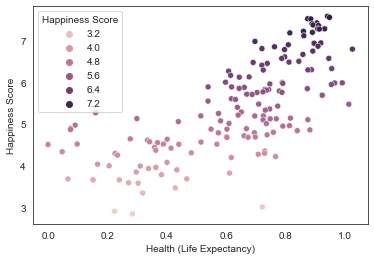

In [220]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',hue='Happiness Score', data=new_data)

Health also positively correlates with the Happiness Score

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

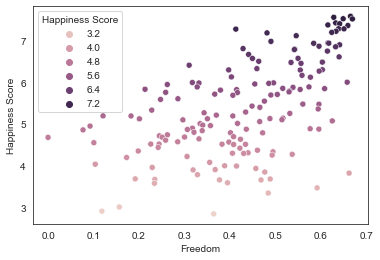

In [221]:
sns.scatterplot(x='Freedom',y='Happiness Score',hue='Happiness Score', data=new_data)

Health also positively correlates with the Happiness Score

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

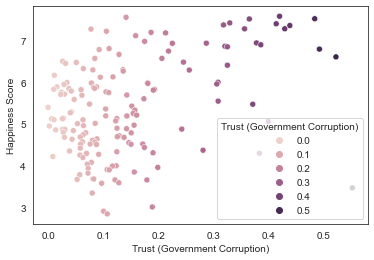

In [222]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',hue='Trust (Government Corruption)', data=new_data)

High corruption leads the highest happiness whereas the majority lies in low corruption, Corruption negatively correlates to Happiness score

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

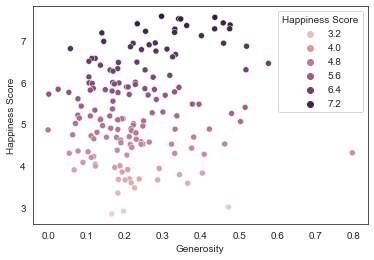

In [223]:
sns.scatterplot(x='Generosity',y='Happiness Score',hue='Happiness Score', data=new_data)

high happiness score lies between Generocity 0.2 to 0.5

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

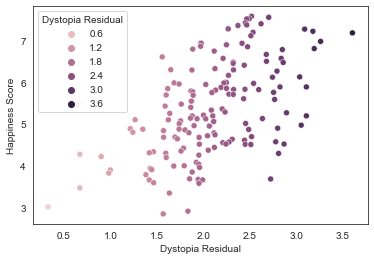

In [224]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',hue='Dystopia Residual', data=new_data)

Dystopia postively correlates with the Happiness score

Observation: 
    1. each factor except the corruption positively correlates with the happiness score
    

Multivariate EDA

In [225]:
corr=new_data.corr()

<AxesSubplot:>

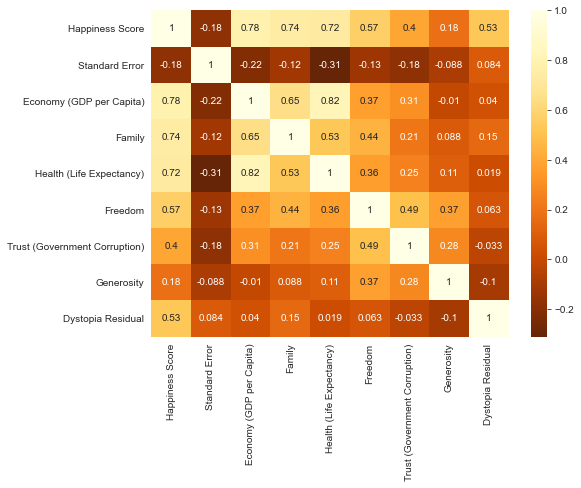

In [226]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='YlOrBr_r',annot=True)

Economy(GDP per capita), Family, Health(Life Exceptancy) contributes more in happiness score
standard error and Generocity contributes -0.18 and .18 resepectively

Lets verify how coutry and region correlates with the happiness score

In [227]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_data['Region']=LE.fit_transform(new_data['Region'])
new_data['Country']=LE.fit_transform(new_data['Country'])
new_data.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [228]:
corr=new_data.corr()

<AxesSubplot:>

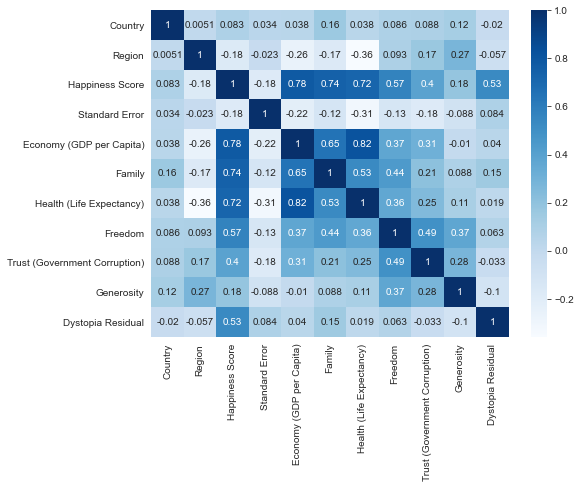

In [229]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='Blues',annot=True)

lets drop country and Region as happinesss core in not much impacted by the country or region

In [230]:
new_data.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Handling outliers

In [231]:
from scipy.stats import zscore

z=np.abs(zscore(new_data))

train=new_data[(z<3).all(axis=1)]

In [232]:
new_data.shape

(158, 11)

In [233]:
train.shape

(149, 11)

only 5% of data is removed while fixing the outliers, considered its okay

# SKWENESS

In [234]:
train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Country,0.048701,-1.187003
Region,-0.096985,-1.565466
Happiness Score,0.169740,-0.832230
Standard Error,1.243048,2.080947
Economy (GDP per Capita),-0.390657,-0.806461
Family,-0.811340,0.172549
Health (Life Expectancy),-0.747711,-0.318856
Freedom,-0.400867,-0.447264
Trust (Government Corruption),1.272530,0.921171
Generosity,0.654710,-0.000869


Still the skewness exist in standard error,Family,Health,Trust, generocity..... lets perform some techniques to remove skewness in data

standard error and Trust is highly skewed      
family,Health,Generocity is moderately skewed      
rest columns are fairly symmetrical

<AxesSubplot:>

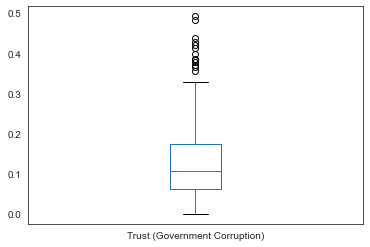

In [235]:
train['Trust (Government Corruption)'].plot(kind='box')

In [238]:
train.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.350502,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.132299,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.394451,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.311176,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.284856,0.45811,2.45176


In [236]:
train['Trust (Government Corruption)']=np.log1p(train['Trust (Government Corruption)'])

<AxesSubplot:>

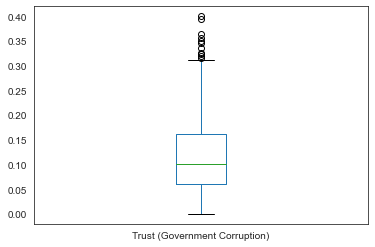

In [166]:
train['Trust (Government Corruption)'].plot(kind='box')

In [239]:
x=train.drop('Happiness Score',axis=1)
y=train['Happiness Score']

In [243]:
from sklearn.preprocessing import PowerTransformer

power=PowerTransformer()
x=pd.DataFrame(power.fit_transform(x),columns=x.columns)


In [244]:
train.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Country,0.048701,-1.187003
Region,-0.096985,-1.565466
Happiness Score,0.169740,-0.832230
Standard Error,1.243048,2.080947
Economy (GDP per Capita),-0.390657,-0.806461
Family,-0.811340,0.172549
Health (Life Expectancy),-0.747711,-0.318856
Freedom,-0.400867,-0.447264
Trust (Government Corruption),1.095190,0.465294
Generosity,0.654710,-0.000869


<AxesSubplot:>

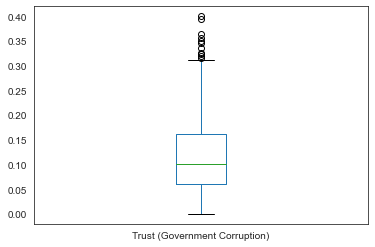

In [245]:
train['Trust (Government Corruption)'].plot(kind='box')

<AxesSubplot:>

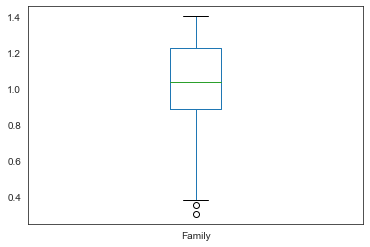

In [246]:
train['Family'].plot(kind='box')

<AxesSubplot:>

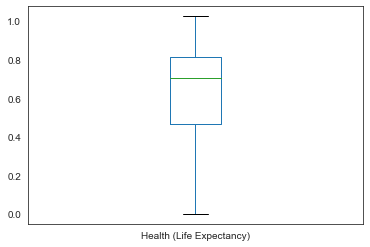

In [247]:
train['Health (Life Expectancy)'].plot(kind='box')

<AxesSubplot:>

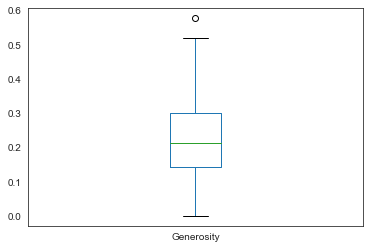

In [248]:
train['Generosity'].plot(kind='box')

Splitting the data

In [249]:
train.skew()

Country                          0.048701
Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [250]:
x=train.drop('Happiness Score',axis=1)
y=train['Happiness Score']

In [251]:
x.head()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.350502,0.29678,2.51738
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.132299,0.43630,2.70201
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.394451,0.34139,2.49204
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.311176,0.34699,2.46531
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.284856,0.45811,2.45176


In [252]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import r2_score

In [254]:
best_acc=0
best_random=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=r2_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)
    

Best Accuracy score is :  0.9999863030082801  and Random_state is :  99


Linear regression accuracy is nearly 100%. lets split the data

In [255]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)

In [256]:
## Since i saw an overfitting in my model i am trying to standardise data set
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x_train_scaled=scaler.fit_transform(x_train)

In [257]:
#x_train_scaled

In [258]:
#now lets fit the SC to x_test
#x_test_scaled=scaler.transform(x_test)

In [259]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
accuracy=r2_score(y_test,pred)
    
print("Accuracy is : ", accuracy)

print("Errors: ")
print('mean Absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test,pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))


Accuracy is :  0.9999718866877122
Errors: 
mean Absolute error:  0.004589613971872157
Mean squared error:  3.184535636827381e-05
Root mean squared error:  0.005643169000506171


lets perform some ensemble baggin and boosting technique

In [260]:
from sklearn.ensemble import AdaBoostRegressor

In [261]:
ad=AdaBoostRegressor(LinearRegression())
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
ad_acc=r2_score(y_test, pred)
print(ad_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, ad_pred))
print('Mean squared error: ', mean_squared_error(y_test,ad_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,ad_pred)))

0.9999718866877122
Errors:
mean Absolute error:  0.004526530895029731
Mean squared error:  3.723516357027964e-05
Root mean squared error:  0.006102062239135196


In [262]:
from sklearn.ensemble import RandomForestRegressor

In [279]:
RFR=RandomForestRegressor(criterion='mae')
RFR.fit(x_train,y_train)

RFR_pred=ad.predict(x_test)
RFR_acc=r2_score(y_test, RFR_pred)
print(RFR_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, RFR_pred))
print('Mean squared error: ', mean_squared_error(y_test,RFR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,RFR_pred)))

0.9999671285267016
Errors:
mean Absolute error:  0.004526530895029731
Mean squared error:  3.723516357027964e-05
Root mean squared error:  0.006102062239135196


All the models are giving me nearly 100% accuracy, lets perform cross validation

In [280]:
from sklearn.model_selection import cross_val_score

In [281]:
print("Linear regression r2_score is :", cross_val_score(LR,x,y,cv=5).mean())

Linear regression r2_score is : 0.9991508881153438


In [282]:
print("AdaBoostRegressor r2_score is :", cross_val_score(ad,x,y,cv=5,scoring='r2').mean())

AdaBoostRegressor r2_score is : 0.9991394251832617


In [283]:
print("Random forest regressor r2_score is :", cross_val_score(RFR,x,y,cv=5,scoring='r2').mean())

Random forest regressor r2_score is : -3.7809233373787796


Kindly help me to understand what mistake i am doing, why my r2_score for random forest regressor corss validation is in negative

best performing model is linear regression

# Hyper parameter tunning

In [289]:
from sklearn.model_selection import GridSearchCV

In [306]:
parameter={'n_estimators':np.arange(2,10),
           'loss':['linear', 'square', 'exponential']}

In [307]:
gvc=GridSearchCV(AdaBoostRegressor(),parameter,cv=5)

In [308]:
gvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [312]:
gvc.best_params_

{'loss': 'square', 'n_estimators': 7}

In [319]:
Final_mod=AdaBoostRegressor(loss='square',n_estimators=7)
Final_mod.fit(x_train,y_train)
final_pred=Final_mod.predict(x_test)
ad_acc=r2_score(y_test, final_pred)
print(ad_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, RFR_pred))
print('Mean squared error: ', mean_squared_error(y_test,RFR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,RFR_pred)))

0.8298951995017063
Errors:
mean Absolute error:  0.004526530895029731
Mean squared error:  3.723516357027964e-05
Root mean squared error:  0.006102062239135196


# SAVING THE MODEL

In [321]:
import joblib

joblib.dump(Final_mod,'final_model.pkl')

['final_model.pkl']